<h1><center><font size=8>AIML - Project 7 - Bank Churn Prediction</center></font></h1>
<center><img src="https://miro.medium.com/v2/resize:fit:1386/format:webp/1*X-oZNRw5Pnef-kR9CgLx1g.png" width="400" height="300"></center>

# **Bank Churn Prediction**

###**Backgroung and Context**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

###**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

###**Data Description**

 - CustomerId: Unique ID which is assigned to each customer
 - Surname: Last name of the customer 
 - CreditScore: It defines the credit history of the customer.  
 - Geography: A customer’s location    
 - Gender: It defines the Gender of the customer   
 - Age: Age of the customer     
 - Tenure: Number of years for which the customer has been with the bank
 - NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
 - Balance: Account balance
 - HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
 - EstimatedSalary: Estimated salary 
 - isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
 - Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

### Importing Libraries

In [25]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0


In [ ]:
!pip install tensorflow

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
warnings.filterwarnings("ignore")

## Reading the dataset

In [25]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Reading data from excel and copying in another dataframe
originalData = pd.read_csv("/content/drive/My Drive/Python Learning/Projects/Project7/bank.csv")
Data = originalData

## **Introductory Steps**

In [25]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Data Overview

In [26]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [28]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and rest columns are numerical.


In [29]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [30]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There are no null values in data.

In [31]:
Data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* There us impbalance in tearget variable data. There are few customers(20%) in data represnting  customer who left bank. 

In [32]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* RowNumber and CustomerId seems to be ro identification columns and can be ignored from final analysis and modelling. 
* Balance and EstimatedSalary seems to be right skewed.



In [33]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the column `CustomerId` is a unique identifier for an employee. Hence we can drop this column as it will not add any predictive power or value to the model.
* Column - `Geography, Gender, HasCrCard, IsActiveMember` seems to be categorical column based on number of values. 

###  Categorical and Numerical Data Analysis

In [34]:
# Get  columns whose data type is object i.e. string
objectColumns = Data.dtypes[Data.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['Surname', 'Geography', 'Gender']


In [35]:
# List of numerical columns
objectColumns = Data.dtypes[Data.dtypes != np.object]
# list of columns whose data type is notobject i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [36]:
#Qualitfied few objects columns and added some nueric boolean columns which seens like categories to get unique value counts 
categorical_cols=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

numerical_cols = [ 
 'CreditScore', 
 'Age', 
 'Tenure', 
 'Balance', 
 'NumOfProducts', 
 'EstimatedSalary']

In [37]:
#Analyze values for Categorcal columns
for column in categorical_cols:
    print(Data[column].value_counts())
    print('-'*50)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
--------------------------------------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
--------------------------------------------------


* France Geography has maximum number of customers in data set.
* Customer data has more Male records then Female.
* Majority customer population owns credit card.
* There are many inactive customers in dataset.


### Data Pre-processing

In [27]:
# RowNumber and  CustomerId column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="RowNumber", inplace=True)
Data.drop(columns="CustomerId", inplace=True)
Data.drop(columns="Surname", inplace=True)

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## **EDA**

### Univariate Analysis

In [40]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [41]:
Data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

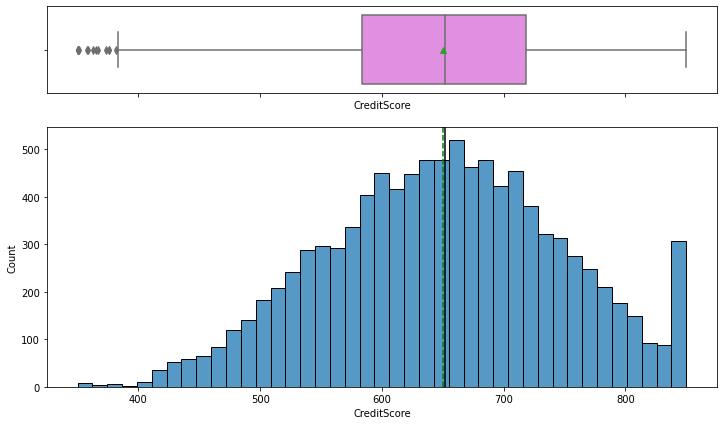

In [42]:
histogram_boxplot(Data, "CreditScore")

* From the above plot, we observe that Credit Score is normally distributed with very few outliers. 

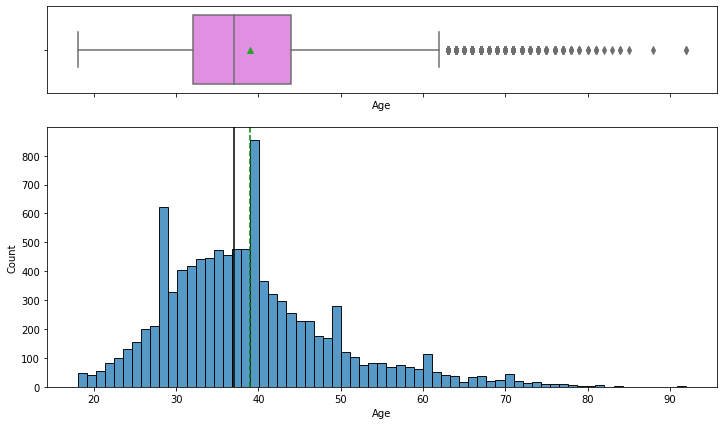

In [43]:
histogram_boxplot(Data, "Age")

* From the plot, we observe that majority population in customer data falls in ager range of 25 to 55.

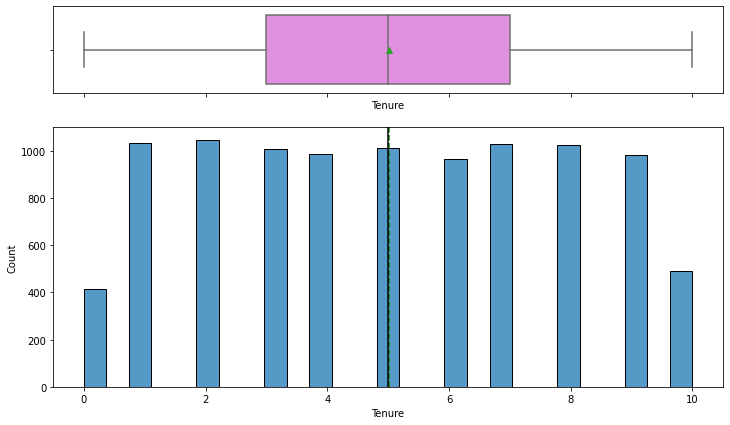

In [44]:
histogram_boxplot(Data, "Tenure")

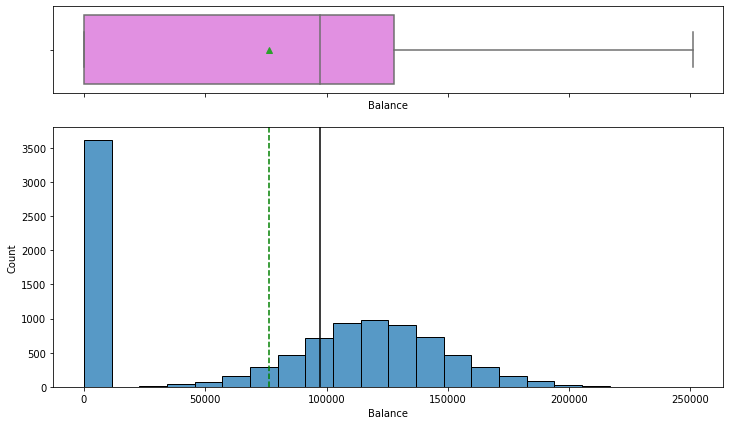

In [45]:
histogram_boxplot(Data, "Balance")

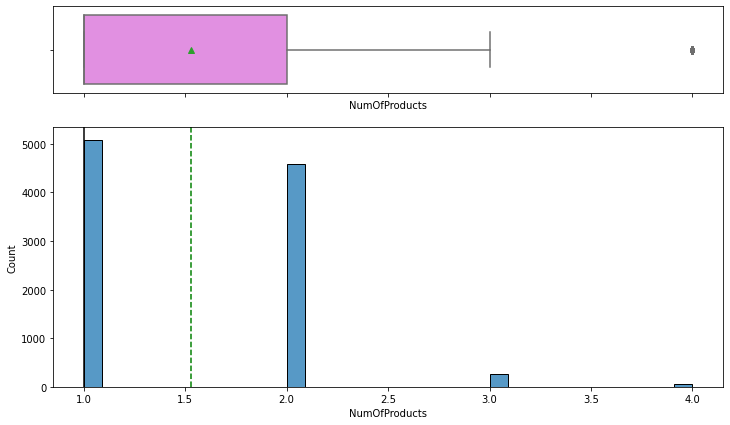

In [46]:
histogram_boxplot(Data, "NumOfProducts")

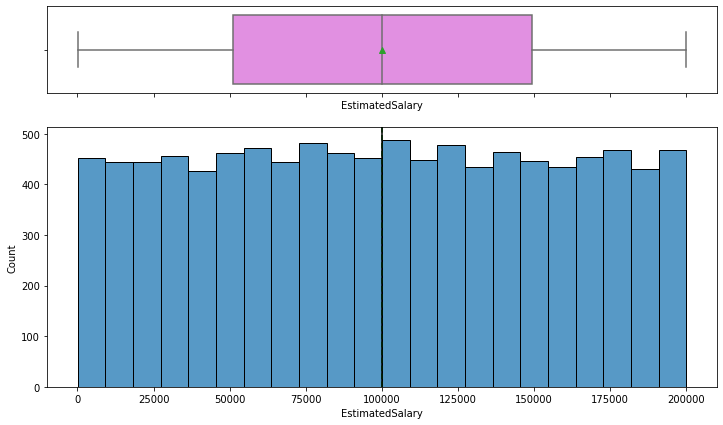

In [47]:
histogram_boxplot(Data, "EstimatedSalary")

In [48]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

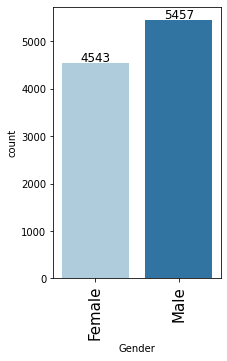

In [49]:
labeled_barplot(Data, "Gender")

* There are  more males in this dataset in comparison to females. 


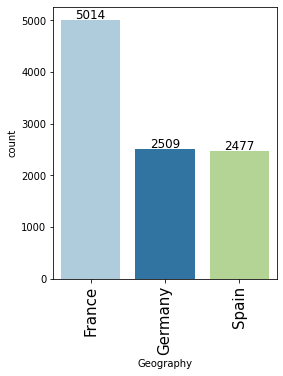

In [50]:
labeled_barplot(Data, "Geography")

* France geography has more customers then Germany and Spain.

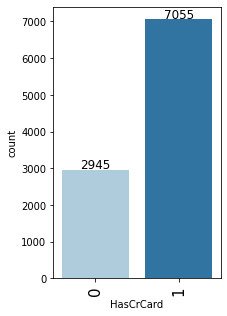

In [51]:
labeled_barplot(Data, "HasCrCard")

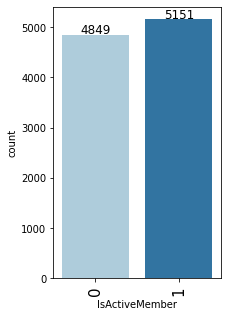

In [52]:
labeled_barplot(Data, "IsActiveMember")

0    7963
1    2037
Name: Exited, dtype: int64


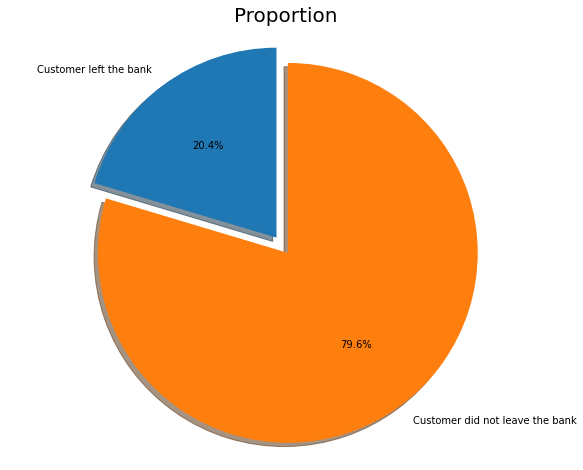

In [53]:
print(Data.Exited.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [Data.Exited[Data['Exited']==1].count(),Data.Exited[Data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20% of the employees in this dataset exited from bank.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

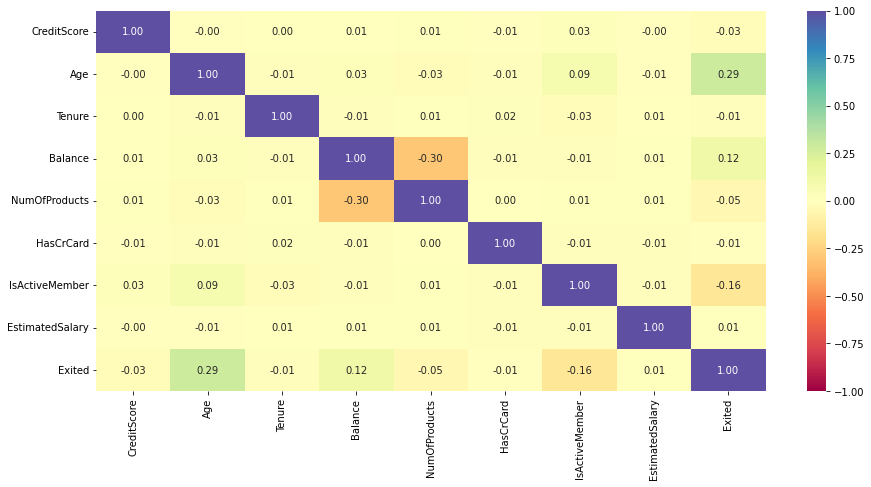

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(Data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [55]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Exited for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of Exited for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

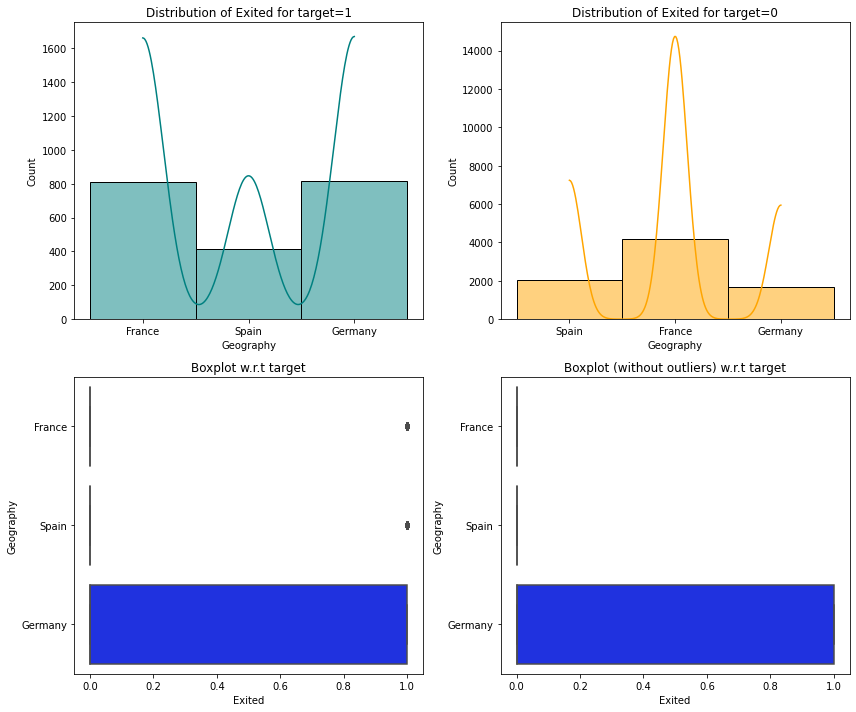

In [56]:
distribution_plot_wrt_target(Data, "Geography", "Exited")

* From the above plot, we observe that customers leaving bank has more data points from Germany and France compared to Spain.

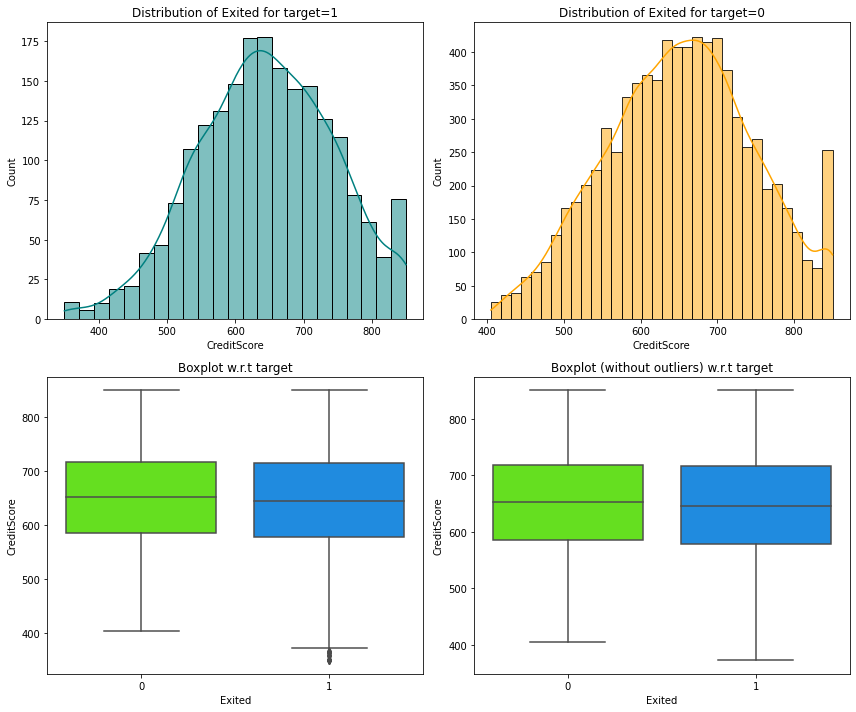

In [57]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

* Credit score distribution indicates there is no specific pattern in Exited/staying customers. 

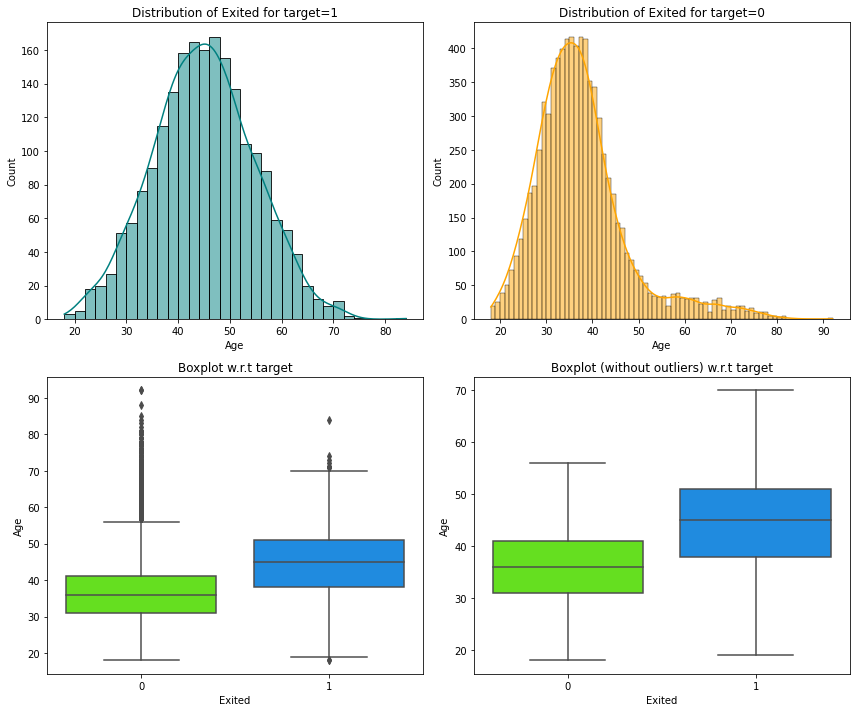

In [58]:
distribution_plot_wrt_target(Data, "Age", "Exited")

* Age distribution indicates there is no specific pattern in Exited/staying customers. 

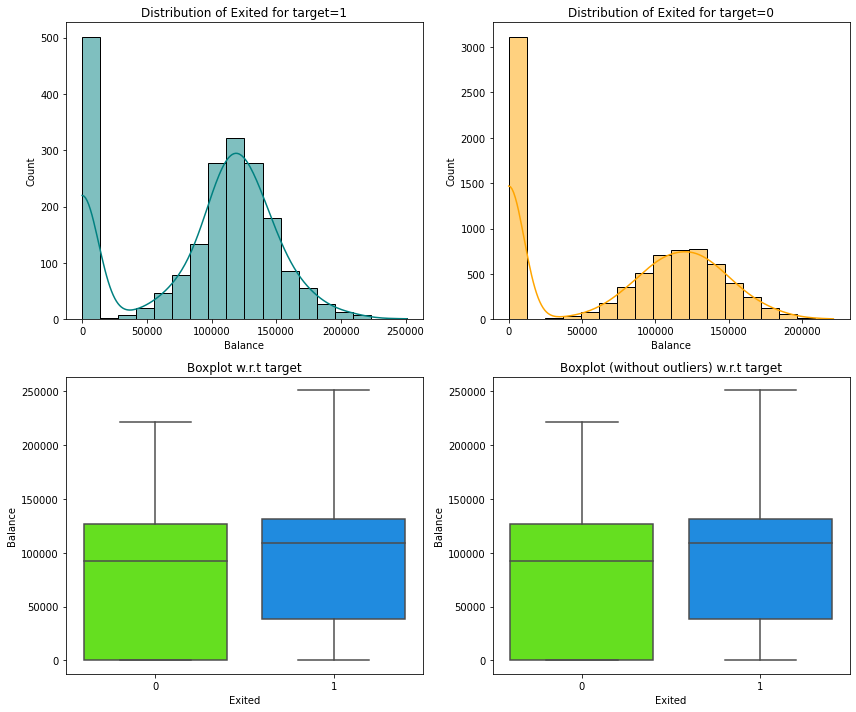

In [59]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

* Account Balance:  Customers with 10,000 to 15000 account balance are more in exited category.

In [60]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


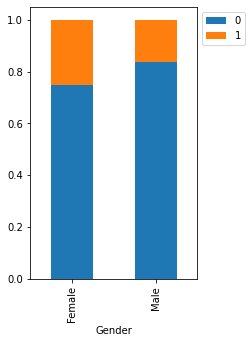

In [61]:
stacked_barplot(Data, "Gender", "Exited")

* From the above plot, it is observed that the likelihood of Female Customers leaving Bank is more than Male customers.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


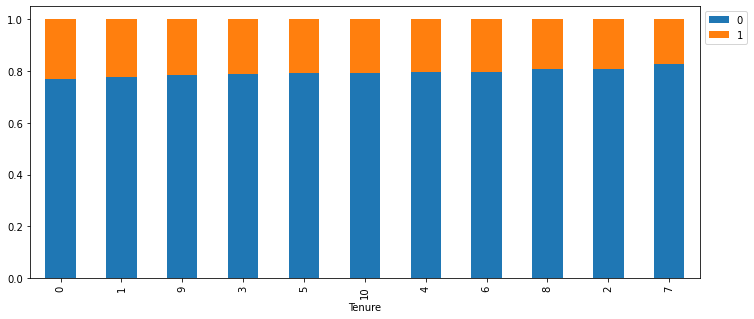

In [62]:
stacked_barplot(Data, "Tenure", "Exited")

* From the above plot, we see that Tenure doesn't have much influence on Exited/Stayed customers. 

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


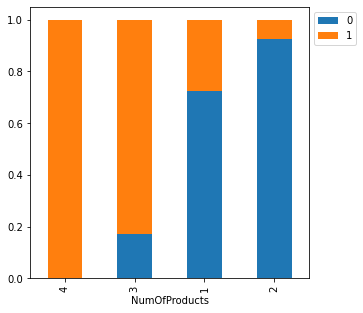

In [63]:
stacked_barplot(Data, "NumOfProducts", "Exited")

* Number Of product Owned Vs Exited - This plot provides interesting data. Seems customers with more products from Bank are tend to leave. This may be indication that Bank is not able to help customers with more products and not able to keep them happy with Services. 

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


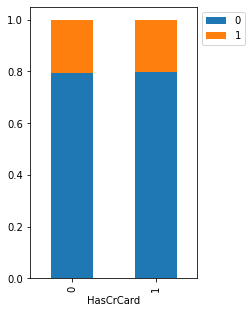

In [64]:
stacked_barplot(Data, "HasCrCard", "Exited")

* Customers credit card avai;ability doesn't show any impact on them leaving or staying with bank. 

###  EDA Summary 

* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and rest columns are numerical.
* There are no null values in data.
* There us impbalance in tearget variable data. There are few customers(20%) in data represnting  customer who left bank. 
* RowNumber and CustomerId seems to be ro identification columns and can be ignored from final analysis and modelling. 
* Balance and EstimatedSalary seems to be right skewed.
* Credit Score is normally distributed with very few outliers. 
* France Geography has maximum number of customers in data set.
* Customer data has more Male records then Female.
* Majority customer population owns credit card.
* There are many inactive customers in dataset.
* Credit score,Age distribution indicates there is no specific pattern in Exited/staying customers. 
* Account Balance:  Customers with 10,000 to 15000 account balance are more in exited category. 
* Number Of product Owned Vs Exited - This plot provides interesting data. Seems customers with more products from Bank are tend to leave. 


##  Data Processing  

### Missing Value Imputation

* There are no missing value in data. No Imputation required. 

### Outlier Detection

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

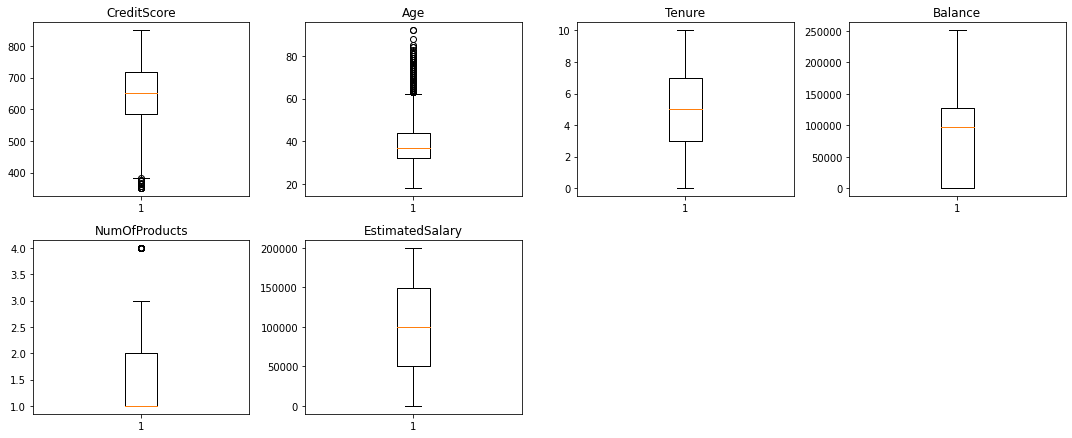

In [65]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(Data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Only creaditScore and Age shows some outliers. This may not necessarily be outlier. Skipping outlier treatment for these fields.  

### Split data

In [28]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data[['Exited']]

In [29]:
# Splitting data into training and test set: first we split data into 2 parts, say temporary and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)
print(X_train.shape, X_test.shape)

(8000, 10) (2000, 10)


In [30]:
y_test.value_counts(normalize=True) #Test

Exited
0         0.7965
1         0.2035
dtype: float64

In [31]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

### Encoding Categorical Columns

* In this scenario since order of fields are not important we will be using One-Hot encoding.

In [32]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(8000, 11) (2000, 11)


In [33]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000, 1)
(2000, 1)


## **Model Building**

* Defining common method to be used in all models.

In [11]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

#### **A model can make wrong predictions in the following ways:**
* Predicting a customer is leaving bank, when he/she is not leaving bank. 
* Predicting a customer is not leaving bank, when he/she is in fact leaving the bank.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not identifying a cutomer who is not planning to leave the bank (by wrongly classifying them as likely to leave) might lead to spend more time focuing on that customer, and the bank might lose time focusing on that customer. However, not identifying a cutomer who is  planning to leave would lead to a financial loss for the bank.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the recall evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score.


### Adding layers [layers and activations]

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

There are many WI techniques as follows:

1) Random normal initialization - kernel_initializer='random_normal'

2) Random Uniform initialization

3) Xaviour Initialization

4) He Initialization 



In [ ]:
#initializer = tf.keras.initializers.HeUniform() ##HeNormal, 
#initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
#initializer = tf.keras.initializers.GlorotNormal() -- Also called as Xavier normal initializer
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
#initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)

### Optimizer selection options
Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of 
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl



### Model 0 - Basic Model. 1 Hidden layer. No Drop Out - SGD Optimizer

In [73]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
# We will be adding the layers sequentially
model_0 = Sequential()

# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_0.add(Dense(64, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid')) 

In [75]:
# Create optimizer with default learning rate
model_0.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy']) 
model_0.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [76]:
history0=model_0.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=30,
          batch_size=32,verbose=1)

Epoch 1/30
200/200 [==============================] - 2s 5ms/step - loss: 3238869.7500 - accuracy: 0.7905 - val_loss: 1.6089 - val_accuracy: 0.8000
Epoch 2/30
200/200 [==============================] - 1s 4ms/step - loss: 0.5947 - accuracy: 0.7953 - val_loss: 0.6868 - val_accuracy: 0.8000
Epoch 3/30
200/200 [==============================] - 1s 4ms/step - loss: 0.6785 - accuracy: 0.7953 - val_loss: 0.6705 - val_accuracy: 0.8000
Epoch 4/30
200/200 [==============================] - 1s 4ms/step - loss: 0.6633 - accuracy: 0.7953 - val_loss: 0.6558 - val_accuracy: 0.8000
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 0.6495 - accuracy: 0.7953 - val_loss: 0.6424 - val_accuracy: 0.8000
Epoch 6/30
200/200 [==============================] - 1s 6ms/step - loss: 0.6370 - accuracy: 0.7953 - val_loss: 0.6304 - val_accuracy: 0.8000
Epoch 7/30
200/200 [==============================] - 1s 6ms/step - loss: 0.6257 - accuracy: 0.7953 - val_loss: 0.6194 - val_accuracy: 0.8000


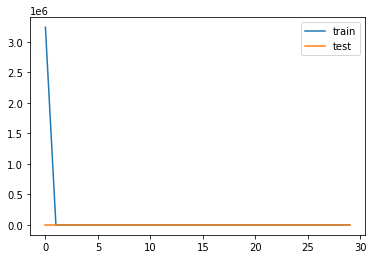

In [77]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history0.history)
hist['epoch'] = history0.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

There doesn't seems be noise in data. after very few epochs, model os pretty static on accuracy for both training and test data. 

Let's check the other metrices.

#### Evaluation - Model 0
Keras model can be evaluated with evaluate() function
Evaluation results are contained in a list

In [78]:
y_pred_0_test=model_0.predict(X_test)
y_pred_0_test = (y_pred_0_test > 0.5)
y_pred_0_test

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

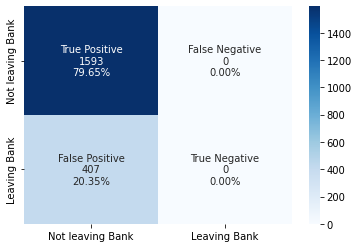

In [79]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_0_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Based on confusion metrics it seems model is not making any mistake in customers Leaving bank area. But for customers not leaving back, there are 20% false positive. 

In [80]:
#Printing results
results = model_0.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7965


In [81]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_0_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



* F1-Score looks ok for this model. Accuracy is not that hogh but decent keeping other scores in mind. 

### Model 1 - 3 Hidden layer. No Drop Out - Adam Optimizer

In [82]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [83]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_1.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid')) 

In [84]:
# Create optimizer with default learning rate
model_1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 

In [85]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [88]:
history1=model_1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=70,
          batch_size=64,verbose=1)

Epoch 1/70
100/100 [==============================] - 2s 15ms/step - loss: 16.6359 - accuracy: 0.6834 - val_loss: 15.4283 - val_accuracy: 0.7937
Epoch 2/70
100/100 [==============================] - 1s 14ms/step - loss: 13.9731 - accuracy: 0.6802 - val_loss: 5.6117 - val_accuracy: 0.7538
Epoch 3/70
100/100 [==============================] - 1s 11ms/step - loss: 8.1572 - accuracy: 0.6784 - val_loss: 4.3399 - val_accuracy: 0.6488
Epoch 4/70
100/100 [==============================] - 1s 9ms/step - loss: 16.6577 - accuracy: 0.6748 - val_loss: 14.0184 - val_accuracy: 0.7844
Epoch 5/70
100/100 [==============================] - 1s 7ms/step - loss: 13.4371 - accuracy: 0.6800 - val_loss: 9.4022 - val_accuracy: 0.7475
Epoch 6/70
100/100 [==============================] - 1s 7ms/step - loss: 9.4327 - accuracy: 0.6791 - val_loss: 2.1999 - val_accuracy: 0.7837
Epoch 7/70
100/100 [==============================] - 1s 7ms/step - loss: 6.9082 - accuracy: 0.6775 - val_loss: 7.7880 - val_accuracy: 0.69

63/63 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7945


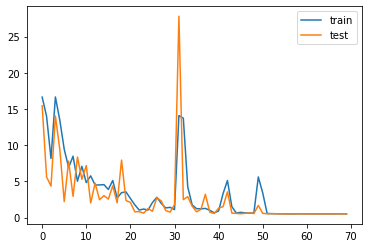

In [89]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

#Printing results
results = model_1.evaluate(X_test, y_test)

There is  noise in early stages of learning. Noise in the loss behavior here. 
Let's check the other metrices.

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.208442, G-Mean=0.147


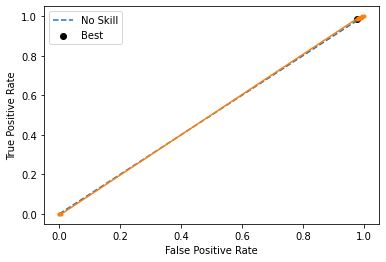

In [90]:
# predict probabilities
yhat1 = model_1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [91]:
y_pred_1_test=model_1.predict(X_test)
y_pred_1_test = (y_pred_1_test > 0.5)
y_pred_1_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

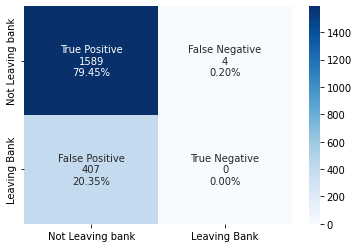

In [92]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_1_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leaving bank','Leaving Bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Evaluation


In [93]:
score = model_1.evaluate(X_test, y_pred_1_test)
print(score)

63/63 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 1.0000
[0.2315051108598709, 1.0]


In [94]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_1_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.71      2000



* This model seems to have similar performance as model 0. 

We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2 - 4 Hidden layer. Drop Out after each layer - Adam Optimizer

In [113]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [114]:
# We will be adding the layers sequentially
model_2 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_2.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation = 'sigmoid')) 

In [115]:
# Create optimizer with default learning rate
model_2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 

In [36]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [116]:
history2=model_2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
100/100 [==============================] - 3s 10ms/step - loss: 905.8965 - accuracy: 0.6720 - val_loss: 37.8767 - val_accuracy: 0.7369
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 30.6007 - accuracy: 0.7392 - val_loss: 2.7036 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 2.7316 - accuracy: 0.7861 - val_loss: 0.6583 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.6007 - accuracy: 0.7928 - val_loss: 0.6001 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5618 - accuracy: 0.7942 - val_loss: 0.5787 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5375 - accuracy: 0.7942 - val_loss: 0.5608 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7944 - val_loss: 0.5492 - val_accuracy: 0.8000
E

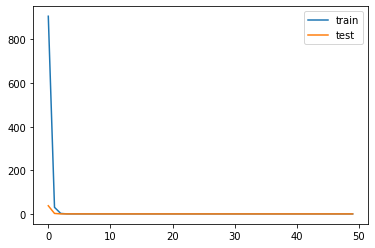

In [117]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.201393, G-Mean=0.087


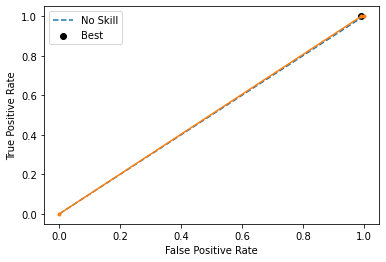

In [118]:
# predict probabilities
yhat1 = model_2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [119]:
#Predicting the results using best as a threshold
y_pred_2_test=model_2.predict(X_test)
y_pred_2_test = (y_pred_2_test > thresholds1[ix])
y_pred_2_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

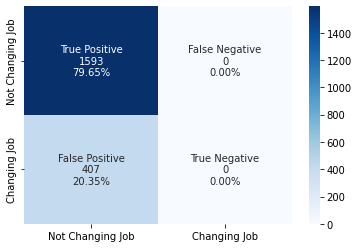

In [120]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_2_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Evaluation

In [121]:
score = model_2.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7965
[0.5047334432601929, 0.796500027179718]


In [122]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_2_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Adding drop out is not making significant change in model performance. 

### Model 3 -4 Hidden layer. BatchNormalization after each layer - Adam Optimizer

In [123]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [124]:
# We will be adding the layers sequentially
model_3 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_3.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(32, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(1, activation = 'sigmoid')) 

In [125]:
# Create optimizer with default learning rate
model_3.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [126]:
history3=model_3.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
100/100 [==============================] - 4s 8ms/step - loss: 0.6208 - accuracy: 0.6778 - val_loss: 0.6316 - val_accuracy: 0.6187
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5273 - accuracy: 0.7889 - val_loss: 0.5131 - val_accuracy: 0.8006
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5064 - accuracy: 0.7933 - val_loss: 0.5261 - val_accuracy: 0.7650
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5024 - accuracy: 0.7950 - val_loss: 0.5270 - val_accuracy: 0.7944
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5019 - accuracy: 0.7953 - val_loss: 0.5000 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5016 - accuracy: 0.7953 - val_loss: 0.4990 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.7953 - val_loss: 0.4980 - val_accuracy: 0.8000
Epoch 

In [127]:
y_pred_3_test=model_3.predict(X_test)
y_pred_3_test = (y_pred_3_test > 0.5)
y_pred_3_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

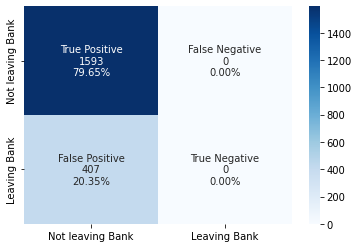

In [128]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_3_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.185031, G-Mean=0.548


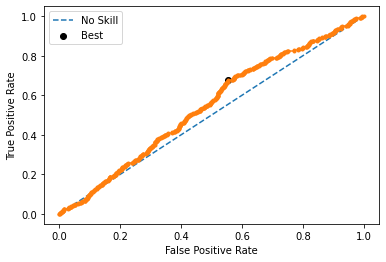

In [129]:
 # predict probabilities
yhat1 = model_3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

####Evaluation

In [130]:
#Printing results
results = model_3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7965


In [131]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_3_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



### Model 4 - 4 Hidden layer. Drop Out and BatchNormalization - Adam Optimizer

In [132]:

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [133]:
# We will be adding the layers sequentially
model_4 = Sequential()

# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_4.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(64, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dense(1, activation = 'sigmoid')) 

In [134]:
# Create optimizer with default learning rate
model_4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               2

In [135]:
history4=model_4.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
100/100 [==============================] - 3s 7ms/step - loss: 0.6717 - accuracy: 0.6470 - val_loss: 0.5436 - val_accuracy: 0.8006
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5358 - accuracy: 0.7747 - val_loss: 0.4960 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.5226 - accuracy: 0.7897 - val_loss: 0.4948 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 1s 7ms/step - loss: 0.5109 - accuracy: 0.7909 - val_loss: 0.5054 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.5112 - accuracy: 0.7941 - val_loss: 0.4937 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.5077 - accuracy: 0.7952 - val_loss: 0.4925 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5087 - accuracy: 0.7941 - val_loss: 0.5104 - val_accuracy: 0.8000
Epoch 

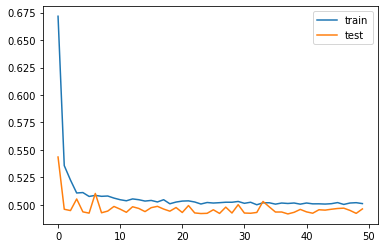

In [136]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

* In this test, test performance seems to lack training performance. 

In [137]:
y_pred_4_test=model_4.predict(X_test)
y_pred_4_test = (y_pred_4_test > 0.5)
y_pred_4_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

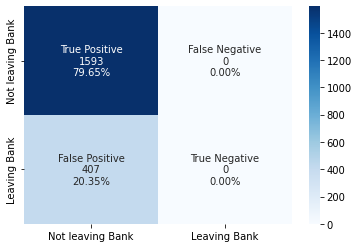

In [138]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_4_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.180409, G-Mean=0.554


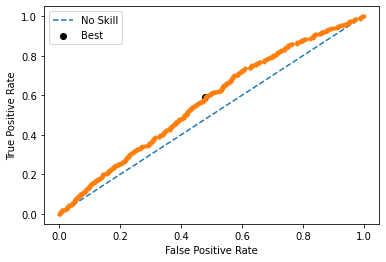

In [139]:
# ROC Curve                   
 # predict probabilities
yhat1 = model_4.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
               

#### Evaluation

In [140]:
#Printing results
results = model_4.evaluate(X_test, y_test)


63/63 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7965


In [141]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_4_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



### Model 5 - Grid Search CV - 4 Hidden layer. Drop Out - Adam Optimizer

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [34]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [35]:
def create_model_v5(lr,batch_size):  

  # We will be adding the layers sequentially
  model_5 = Sequential()
# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
  initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
  model_5.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
  model_5.add(Dense(32, activation='relu'))
  model_5.add(Dropout(0.2))
  model_5.add(Dense(64, activation='relu'))
  model_5.add(Dropout(0.2))
  model_5.add(Dense(64, activation='relu'))
  model_5.add(Dropout(0.2))
  model_5.add(Dense(1, activation = 'sigmoid')) 
  # Create optimizer with default learning rate
  model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 
  return model_5

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [36]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [37]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 2s 6ms/step - loss: 1443.9850 - accuracy: 0.6619 - val_loss: 56.7736 - val_accuracy: 0.7056
Best: 0.795875 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 86.34318232536316


The best model has the following configuration: 

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [38]:
model_5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [39]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history5=model_5.fit(X_train, y_train, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 2s 6ms/step - loss: 472.1484 - accuracy: 0.7786 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5075 - accuracy: 0.7953 - val_loss: 0.5014 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.7953 - val_loss: 0.5014 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7953 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.7953 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.7953 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.7953 - val_loss: 0.5013 - val_accuracy: 0.8000
Epoc

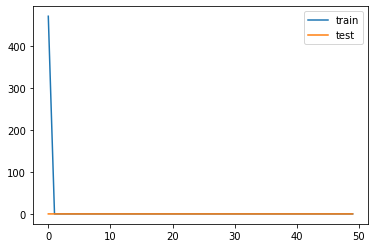

In [40]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

In [41]:
y_pred_5_test=model_5.predict(X_test)
y_pred_5_test = (y_pred_5_test > 0.5)
y_pred_5_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

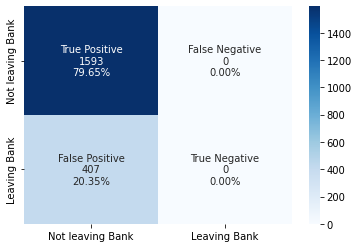

In [42]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_5_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.187274, G-Mean=0.035


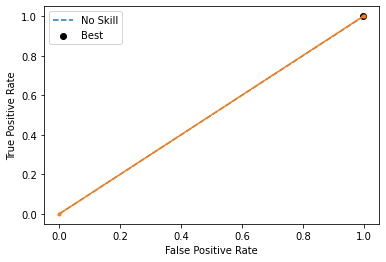

In [43]:
# predict probabilities
yhat1 = model_5.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

####Evaluation

In [44]:
#Printing results
results = model_5.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7965


In [45]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_5_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



* There is no significant change in model performance with this approach. 

### Model 6 - SMOTE - 4 Hidden layer. Drop Out - Adam Optimizer

In [12]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [13]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [14]:
# We will be adding the layers sequentially
model_6 = Sequential()
# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_6.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_6.add(Dense(32, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(1, activation = 'sigmoid')) 

In [15]:
# Create optimizer with default learning rate
model_6.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [16]:
history6=model_6.fit(X_sm, y_sm,           
          validation_split=0.2,
          epochs=50,
          batch_size=64,verbose=1)

Epoch 1/50
160/160 [==============================] - 9s 6ms/step - loss: 878.7053 - accuracy: 0.5585 - val_loss: 2.0658 - val_accuracy: 0.0063
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.8638 - accuracy: 0.6220 - val_loss: 0.9912 - val_accuracy: 0.0000e+00
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 0.7135 - accuracy: 0.6221 - val_loss: 1.0216 - val_accuracy: 0.0000e+00
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.7050 - accuracy: 0.6230 - val_loss: 1.0005 - val_accuracy: 0.0000e+00
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.6842 - accuracy: 0.6231 - val_loss: 1.0172 - val_accuracy: 0.0000e+00
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 0.6832 - accuracy: 0.6238 - val_loss: 1.0131 - val_accuracy: 0.0000e+00
Epoch 7/50
160/160 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.6228 - val_loss: 1.0040 - val_a

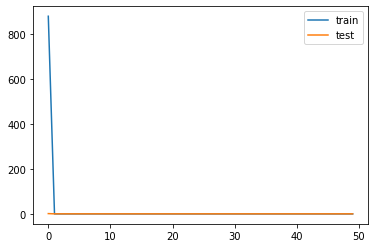

In [17]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

* Model performance is pretty static after first few expochs.

In [18]:
y_pred_6_test=model_6.predict(X_test)
y_pred_6_test = (y_pred_6_test > 0.5)
y_pred_6_test

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

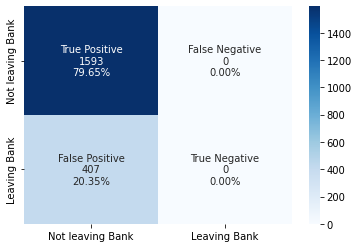

In [19]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_6_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


63/63 [==============================] - 0s 2ms/step
Best Threshold=1.371242, G-Mean=0.000


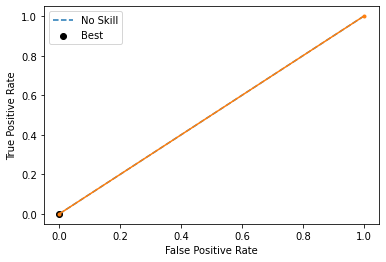

In [21]:
 # predict probabilities
yhat1 = model_6.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Evaluation

In [22]:
#Printing results
results = model_6.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7965


In [23]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_6_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



* Using SMOTE to oversample minority class did not help much with model performance. 

## Model 7 - Early stopping - 4 Hidden layer. Drop Out - Adam Optimizer

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [11]:
import keras

In [12]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [13]:
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0.001,
                                  patience=5,
                                  verbose=1, 
                                  mode='min', 
                                  restore_best_weights= True)
# We will be adding the layers sequentially
model_7 = Sequential()
# First hidden layer with 32 neurons and relu activation function, the input shape tuple denotes number of independent variables
initializer = tf.keras.initializers.HeNormal() ##HeNormal, 
model_7.add(Dense(128, activation='relu', input_shape=(11,), kernel_initializer=initializer))
model_7.add(Dense(32, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(1, activation = 'sigmoid')) 

In [14]:
# Create optimizer with default learning rate
model_7.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [15]:
#fitting the model with Early Stop
history7=model_7.fit(X_train,
                  y_train,
                  batch_size=64,
                  epochs=40,
                  validation_split=0.2,
                  callbacks=[es], 
                  shuffle=True,
                  verbose=1)

Epoch 1/40
100/100 [==============================] - 9s 8ms/step - loss: 1443.9850 - accuracy: 0.6619 - val_loss: 56.7736 - val_accuracy: 0.7056
Epoch 2/40
100/100 [==============================] - 0s 4ms/step - loss: 50.1780 - accuracy: 0.7309 - val_loss: 0.8286 - val_accuracy: 0.7987
Epoch 3/40
100/100 [==============================] - 0s 4ms/step - loss: 0.7154 - accuracy: 0.7894 - val_loss: 0.5910 - val_accuracy: 0.8000
Epoch 4/40
100/100 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.7928 - val_loss: 0.5734 - val_accuracy: 0.8000
Epoch 5/40
100/100 [==============================] - 1s 7ms/step - loss: 0.5271 - accuracy: 0.7928 - val_loss: 0.5566 - val_accuracy: 0.8000
Epoch 6/40
100/100 [==============================] - 1s 6ms/step - loss: 0.5247 - accuracy: 0.7936 - val_loss: 0.5529 - val_accuracy: 0.8000
Epoch 7/40
100/100 [==============================] - 1s 6ms/step - loss: 0.5469 - accuracy: 0.7922 - val_loss: 0.5364 - val_accuracy: 0.8000
E

* As per above run, it's clear that model has stopped early at 25 run (even if the epochs specified were 40).

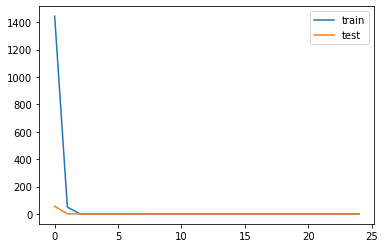

In [16]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "test") , loc =0)

In [17]:
y_pred_7_test=model_7.predict(X_test)
y_pred_7_test = (y_pred_7_test > 0.5)
y_pred_7_test

63/63 [==============================] - 1s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

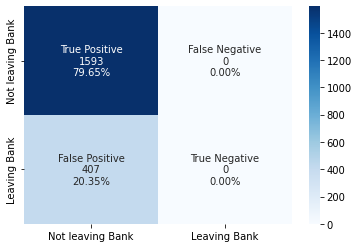

In [20]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_7_test)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not leaving Bank','Leaving Bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.207885, G-Mean=0.120


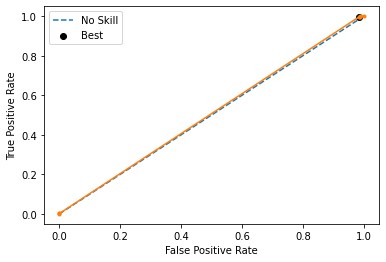

In [21]:
 # predict probabilities
yhat1 = model_7.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Evaluation

In [22]:
#Printing results
results = model_7.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7965


In [24]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_7_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



* Early stopping has similar performance as other models. 

## Model Performance Comparision

In [188]:
#Reading data from excel and copying in another dataframe
modelComparision = pd.read_csv("/content/drive/My Drive/Python Learning/Projects/Project7/modelcomparision.csv")

In [189]:
modelComparision.head(10)

,Model,Accuracy,F1-Score,Recall,ROC-AUC - Best Threshhold,ROC-AUC - G-Mean
0,Model 0 - Basic Model. 1 Hidden layer. No Drop...,0.7965,0.89,1,NaN,NaN
1,Model 1 - 3 Hidden layer. No Drop Out - Adam O...,1.0000,0.89,1,0.20,0.14
2,Model 2 - 4 Hidden layer. Drop Out after each ...,0.7965,0.89,1,0.20,0.08
3,Model 3 - 4 Hidden layer. BatchNormalization a...,0.7965,0.89,1,0.18,0.54
4,Model 4 - 4 Hidden layer. Drop Out and BatchNo...,0.7965,0.89,1,0.18,0.55
5,Model 5 - Grid Search CV - 4 Hidden layer. Dro...,0.7965,0.89,1,0.17,0.03
6,Model 6 - SMOTE - 4 Hidden layer. Drop Out - A...,0.7965,0.89,1,0.37,0.05
7,Model 7 - Early stopping - 4 Hidden layer. Dro...,0.7965,0.89,1,0.20,0.12


* Based on data from above models, it seems that most of the mosdels have similar pefromance. 
* For the optimal balance between false positive and true positive rates, The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.From above, select the threshold with the **largest G-Mean value.**. 
* In this case Model 3 with 4 Hidden layer and BatchNormalization after each layer with Adam Optimizer seems to have similar G-Mean as Model 4. I am aselecting Model 3 over model 4 for similicity of just using BatchNormalization and avoiding drop outs. 

## Business recommendations and insights


* Account Balance:  Customers with 10,000 to 15000 account balance are more in exited category. Bank should focus more in this category and try to retain these customers. Customers in this range tend to use many features from bank and can help helping bank grow. 
* Number Of product Owned Vs Exited - Seems customers with more products from Bank are tend to leave. This may be indication that Bank is not able to help customers with more products and not able to keep them happy with Services.
* Credit score,Age distribution indicates there is no specific pattern in Exited/staying customers. Bank can pay less focus initially to get customer ignoring these attributes. 
* Since there is data impabance and customer leaving the bank has small data set comapre to customer staying back, bank can gather more customer data for leaving customers for further analysis.   
* There is one specific geography(France) which provides more customer data to analyze Exited Vs not Exited customer. Data from other geography may provide more insght. 
* In this case study  Model 3 with 4 Hidden layer and BatchNormalization after each layer with Adam Optimizer seems to have similar G-Mean as Model 4. This model can help predict customers leaving bank in next 6 months with close to 80% accuracy and and F1 Score of .89 . 